<a href="https://colab.research.google.com/github/SinthiyaMoses/AIML/blob/main/HRAnalytics.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import files
uploaded = files.upload()


Saving HR_comma_sep.csv to HR_comma_sep.csv


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# load
df = pd.read_csv("HR_comma_sep.csv")
df.head()
df.info()
df.describe()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   satisfaction_level     14999 non-null  float64
 1   last_evaluation        14999 non-null  float64
 2   number_project         14999 non-null  int64  
 3   average_montly_hours   14999 non-null  int64  
 4   time_spend_company     14999 non-null  int64  
 5   Work_accident          14999 non-null  int64  
 6   left                   14999 non-null  int64  
 7   promotion_last_5years  14999 non-null  int64  
 8   Department             14999 non-null  object 
 9   salary                 14999 non-null  object 
dtypes: float64(2), int64(6), object(2)
memory usage: 1.1+ MB


,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years
count,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000
mean,0.612834,0.716102,3.803054,201.050337,3.498233,0.144610,0.238083,0.021268
std,0.248631,0.171169,1.232592,49.943099,1.460136,0.351719,0.425924,0.144281
min,0.090000,0.360000,2.000000,96.000000,2.000000,0.000000,0.000000,0.000000
25%,0.440000,0.560000,3.000000,156.000000,3.000000,0.000000,0.000000,0.000000
50%,0.640000,0.720000,4.000000,200.000000,3.000000,0.000000,0.000000,0.000000
75%,0.820000,0.870000,5.000000,245.000000,4.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,7.000000,310.000000,10.000000,1.000000,1.000000,1.000000


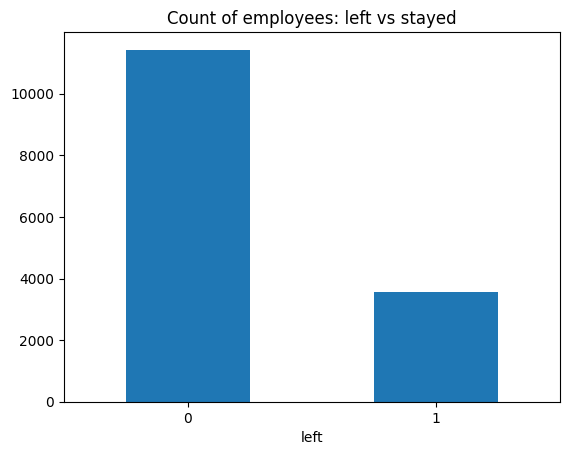

In [3]:
df['left'].value_counts().plot(kind='bar')
plt.title("Count of employees: left vs stayed")
plt.xticks(rotation=0)
plt.show()


In [4]:
print("Proportion left:", df['left'].mean())


Proportion left: 0.2380825388359224


In [6]:
df.groupby('left')[['satisfaction_level', 'last_evaluation', 'average_montly_hours', 'time_spend_company']].mean()

,satisfaction_level,last_evaluation,average_montly_hours,time_spend_company
left,,,,
0,0.666810,0.715473,199.060203,3.380032
1,0.440098,0.718113,207.419210,3.876505


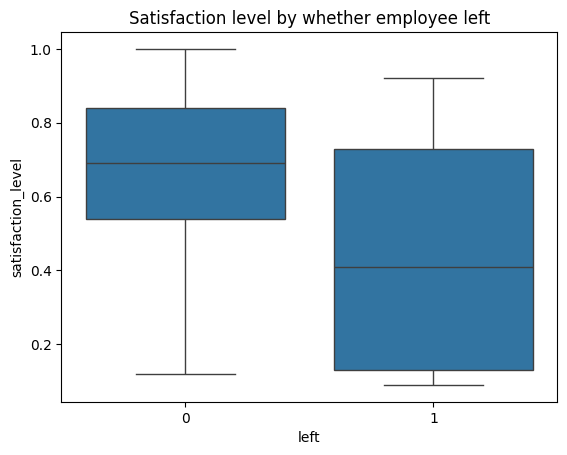

In [7]:
sns.boxplot(x='left', y='satisfaction_level', data=df)
plt.title("Satisfaction level by whether employee left")
plt.show()


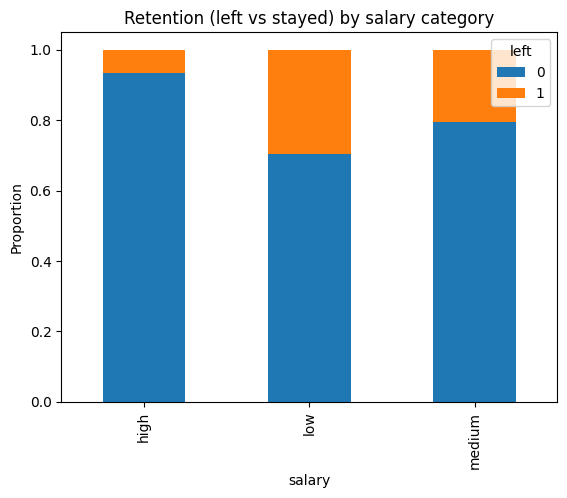

In [8]:
pd.crosstab(df['salary'], df['left'], normalize='index').plot(kind='bar', stacked=True)
plt.title("Retention (left vs stayed) by salary category")
plt.ylabel("Proportion")
plt.show()


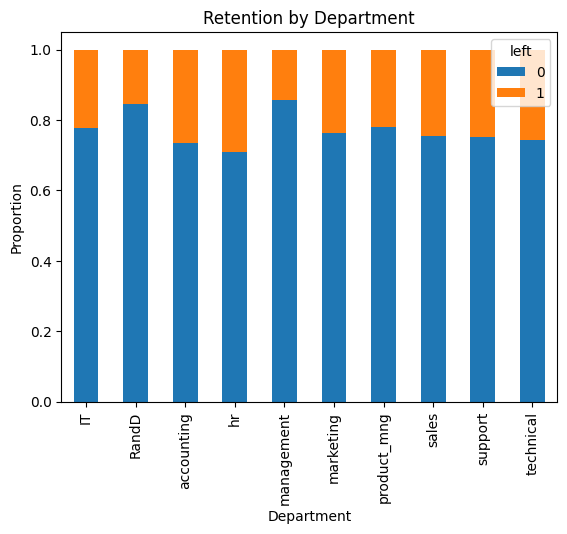

In [10]:
pd.crosstab(df['Department'], df['left'], normalize='index').plot(kind='bar', stacked=True)
plt.title("Retention by Department")
plt.ylabel("Proportion")
plt.show()

<Figure size 600x400 with 0 Axes>

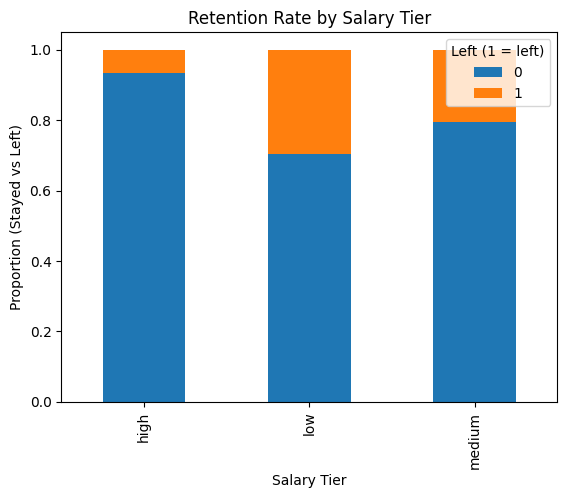

In [11]:
plt.figure(figsize=(6,4))
salary_ret = pd.crosstab(df['salary'], df['left'], normalize='index')
salary_ret.plot(kind='bar', stacked=True)
plt.title("Retention Rate by Salary Tier")
plt.ylabel("Proportion (Stayed vs Left)")
plt.xlabel("Salary Tier")
plt.legend(title="Left (1 = left)")
plt.show()


<Figure size 800x400 with 0 Axes>

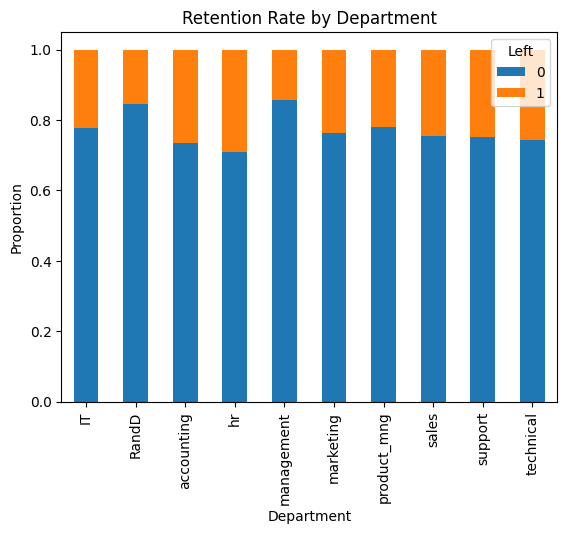

In [13]:
plt.figure(figsize=(8,4))
dept_ret = pd.crosstab(df['Department'], df['left'], normalize='index')
dept_ret.plot(kind='bar', stacked=True)
plt.title("Retention Rate by Department")
plt.ylabel("Proportion")
plt.xlabel("Department")
plt.legend(title="Left")
plt.show()

In [15]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, classification_report, roc_curve

# Define features & target
features = ['salary', 'Department', 'satisfaction_level', 'last_evaluation',
            'average_montly_hours', 'time_spend_company']
X = df[features]
y = df['left']

# Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Preprocessing: for categorical & numeric
categorical_feats = ['salary', 'Department']
numeric_feats = ['satisfaction_level', 'last_evaluation', 'average_montly_hours', 'time_spend_company']

preprocessor = ColumnTransformer(transformers=[
    ('cat', OneHotEncoder(drop='first'), categorical_feats),
    ('num', StandardScaler(), numeric_feats)
])

# Build a pipeline
clf = Pipeline(steps=[
    ('preproc', preprocessor),
    ('logreg', LogisticRegression(max_iter=1000))
])

# Train
clf.fit(X_train, y_train)

# Predict
y_pred = clf.predict(X_test)
y_proba = clf.predict_proba(X_test)[:, 1]

# Metrics
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred))
print("Recall:", recall_score(y_test, y_pred))
print("F1-score:", f1_score(y_test, y_pred))
print("ROC AUC:", roc_auc_score(y_test, y_proba))

print("\nClassification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.7713333333333333
Precision: 0.5386740331491713
Recall: 0.27310924369747897
F1-score: 0.362453531598513
ROC AUC: 0.8019506140163852

Classification Report:
               precision    recall  f1-score   support

           0       0.80      0.93      0.86      2286
           1       0.54      0.27      0.36       714

    accuracy                           0.77      3000
   macro avg       0.67      0.60      0.61      3000
weighted avg       0.74      0.77      0.74      3000



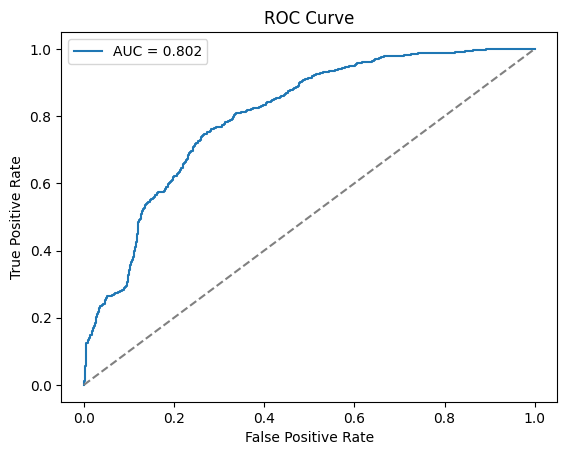

In [16]:
fpr, tpr, thresholds = roc_curve(y_test, y_proba)
plt.plot(fpr, tpr, label=f"AUC = {roc_auc_score(y_test, y_proba):.3f}")
plt.plot([0,1],[0,1], '--', color='gray')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend()
plt.show()


In [17]:
# get feature names after preprocessing
feature_names = (clf.named_steps['preproc']
                   .named_transformers_['cat']
                   .get_feature_names_out(categorical_feats)
               ).tolist() + numeric_feats

coefs = clf.named_steps['logreg'].coef_[0]
for name, coef in zip(feature_names, coefs):
    print(f"{name:30s}: {coef: .4f}")


salary_low                    :  1.7504
salary_medium                 :  1.2213
Department_RandD              : -0.5175
Department_accounting         :  0.1294
Department_hr                 :  0.5280
Department_management         : -0.3309
Department_marketing          :  0.2332
Department_product_mng        :  0.0770
Department_sales              :  0.1747
Department_support            :  0.1687
Department_technical          :  0.2304
satisfaction_level            : -0.9171
last_evaluation               :  0.0070
average_montly_hours          :  0.0740
time_spend_company            :  0.3077
